In [45]:
from sklearn import datasets
mnist = datasets.load_digits()
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [46]:
X, y = mnist["data"], mnist["target"]
X.shape

(1797, 64)

In [47]:
y.shape

(1797,)

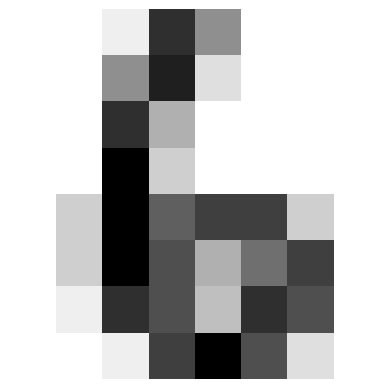

In [48]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[360]

def plot_digit(data):
    image = data.reshape(8, 8)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [49]:
import numpy as np
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = X[:1348], X[1348:], y[:1348], y[1348:]

# Shuffling the training set. This is not a time series or anything like that,
# and we dont want the algorithm to learn the order of the data.
shuffle_index = np.random.permutation(1348)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


[ True]
0.9888888888888889
0.9933184855233853
0.9888641425389755
[[1203   11]
 [   4  130]]
0.9219858156028369
0.9701492537313433
[2235.08724232]
[ True]
[ True]


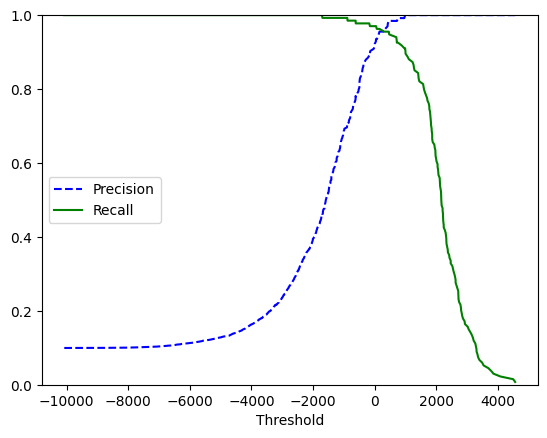

In [50]:
# Lets start with a binary classifier for the number 6 only. It is a smaller problem
# and will help us understand the concepts better.

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve
RANDOM_SEED = 42

y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

# Stochastic Gradient Descent Classifier with a specific random seed
# to make the results reproducible
sgd_clf = SGDClassifier(random_state=RANDOM_SEED)
sgd_clf.fit(X_train, y_train_6)

# Lets test the classifier on the digit we picked earlier
print(sgd_clf.predict([some_digit]))

# Lets use cross validation to evaluate the model
skfolds = StratifiedKFold(n_splits=3, random_state=RANDOM_SEED, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_6):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_6[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_6[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # Test accuracy

# Accuracy is not a good metric for classifiers, especially when the classes are
# imbalanced. Lets use a confusion matrix instead.
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3)
print(confusion_matrix(y_train_6, y_train_pred))
print(precision_score(y_train_6, y_train_pred))
print(recall_score(y_train_6, y_train_pred))

# Lets use the decision function to make predictions instead of the classifier
# using a custom threshold, so we can learn how to use cross_val_predict with
# the decision function.
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

threshold = 2000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3, method="decision_function")
precision, recalls, thresholds = precision_recall_curve(y_train_6, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precision, recalls, thresholds)
plt.show()

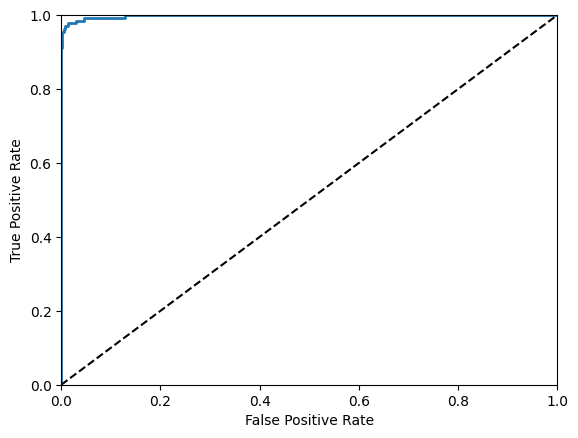

In [51]:
from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y_train_6, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

In [52]:
# Multiclass classification
#Skylearn automatically detects when you try to use a binary classification
# algorithm for a multiclass classification task, and it automatically runs
# OvA (One vs All) or OvO (One vs One) depending on the algorithm. For example,
# it runs OvA for SGDClassifier and OvO for Support Vector Machines.
sgd_clf.fit(X_train, y_train) # This will train 10 binary classifiers (OvA)
print(sgd_clf.predict([some_digit]))

# The decision function returns 10 scores, one for each class
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

# We can force Skylearn to use OvO or OvA, for example, by using the OneVsOneClassifier
# or OneVsRestClassifier classes.
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=RANDOM_SEED))
ovo_clf.fit(X_train, y_train) # This will train 45 binary classifiers (OvO) (n * (n - 1) / 2)
print(ovo_clf.predict([some_digit]))
print(len(ovo_clf.estimators_))

# Using a RandomForestClassifier is simpler because it can directly classify instances
# into multiple classes. It does not need to run OvA or OvO.
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=RANDOM_SEED)
forest_clf.fit(X_train, y_train)
print(forest_clf.predict([some_digit]))
# get the list of probabilities that the classifier assigned to each instance for each class
print(forest_clf.predict_proba([some_digit]))

[6]
[[-1279.30151344 -3118.53809672 -4433.96753137 -2677.81105865
  -2426.92491458 -2060.1349238   1975.72198781 -5889.55951041
  -1071.42843061 -3886.22261908]]
[6]
45
[6]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


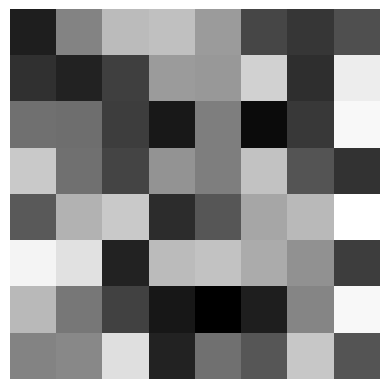

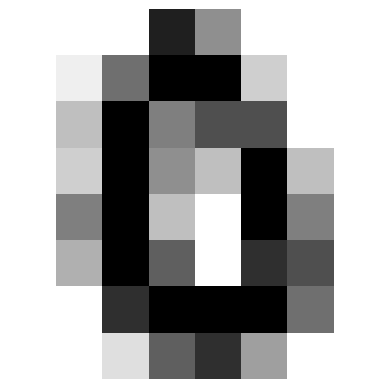

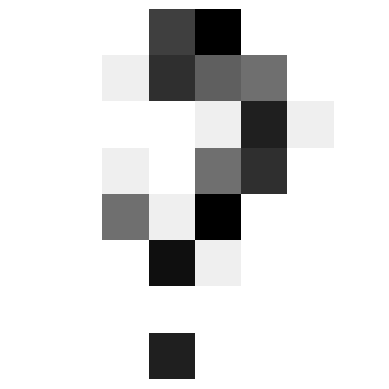

In [55]:
# Multioutput classification.
# This is a generalization of multilabel classification where each label can be
# multiclass (i.e., it can have more than two possible values).
# To illustrate this, lets build a system that removes noise from images.

import numpy.random as rnd
from sklearn.neighbors import KNeighborsClassifier
noise_train = rnd.randint(0, 100, (len(X_train), 64))
noise_test = rnd.randint(0, 100, (len(X_test), 64))

x_train_mod = X_train + noise_train
x_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

knn_clf = KNeighborsClassifier()

plot_digit(x_train_mod[360])
plot_digit(y_train_mod[360])

knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[360]])
plot_digit(clean_digit)